In [114]:
import numpy as np
import pandas as pd
import networkx as nx

#import Utils as Utils

import os
import sys

sys.path.insert(0, '..')

import Utils as Utils

from sklearn.preprocessing import MinMaxScaler


In [116]:
data_path = "PAM50/";
file_name = "BRCADataPM50.txt";
BRCADataPM50 = pd.read_csv(data_path+file_name,sep='\t');
display(BRCADataPM50);
#print(mixed_sim_dataset.columns);

,CLEC3A,CPB1,SCGB2A2,SCGB1D2,TFF1,GSTM1,PIP,S100A7,MUCL1,CYP2B7P1,...,COL9A3,IRX1,AFP,LOC339535,PDZK1IP1,LOC84740,LOC440905,CDH1,ERBB2,PAM50Call_RNAseq
0,1.7015,6.6126,8.3479,7.7986,2.5742,0.0000,5.5251,0.0000,4.8089,1.8887,...,9.3336,8.3217,0.0000,7.2256,7.2343,4.2191,6.0709,14.5226,12.7126,1
1,4.0415,6.2547,10.8725,9.9367,13.1286,12.6025,7.3682,0.0000,10.6232,6.3334,...,5.9591,8.3767,1.2118,0.4104,8.7694,2.5703,6.1650,13.3517,13.1849,2
2,0.8928,6.5801,14.1237,10.6065,13.1892,10.5203,10.3385,0.0000,6.6495,8.7548,...,5.7351,7.9251,1.1923,2.2796,7.8969,3.2608,10.1397,13.9822,12.9618,2
3,0.0000,3.6913,17.1161,15.5172,9.8676,8.1795,7.9117,0.4449,9.6917,5.6983,...,6.5462,7.8543,3.5649,1.2896,6.4660,2.4181,5.8774,13.2457,14.1351,2
4,11.8279,6.9578,10.0564,5.5244,4.2665,0.9130,10.6559,0.0000,14.8774,8.0641,...,5.9106,5.2731,5.3992,4.8849,9.4650,3.7149,2.4368,13.3157,12.1305,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,0.0000,4.0715,3.1285,5.4674,0.0000,7.6400,2.9592,2.5462,0.7184,2.3772,...,6.1955,1.3860,0.4035,6.1438,11.5044,9.8210,5.9083,12.1229,11.6357,4
597,3.1862,11.6245,8.0968,4.8590,9.6830,0.0000,4.1047,0.7443,9.2764,10.6440,...,7.9311,5.7368,1.2328,2.6784,4.5618,1.8944,6.4104,14.7650,14.0283,2
598,15.5830,10.1516,15.6385,14.1262,12.4475,2.5281,12.7570,2.3597,16.5419,12.1057,...,4.5782,3.8431,0.9662,2.2674,11.6040,3.4868,4.8567,14.0134,12.7355,2
599,4.0102,19.2823,12.6806,10.2340,7.4761,7.0284,5.7131,1.8151,9.9208,9.0875,...,5.6524,6.4608,1.2865,4.9311,6.4067,3.3265,6.0473,15.2450,12.4689,2


In [118]:


# # #Normalize the dataset if neccesary. Not normalize discrete variables
# var_type_dict, discrete_list = Utils.check_variable_type(BRCADataPM50);
# print(discrete_list);

# discrete_dataset = BRCADataPM50[discrete_list];

# scaler = MinMaxScaler();
# scaled_values = scaler.fit_transform(BRCADataPM50);

# temp_df = pd.DataFrame(scaled_values)
# temp_df.columns = BRCADataPM50.columns;
# temp_df

pvalue: 1.2640363697273802e-71


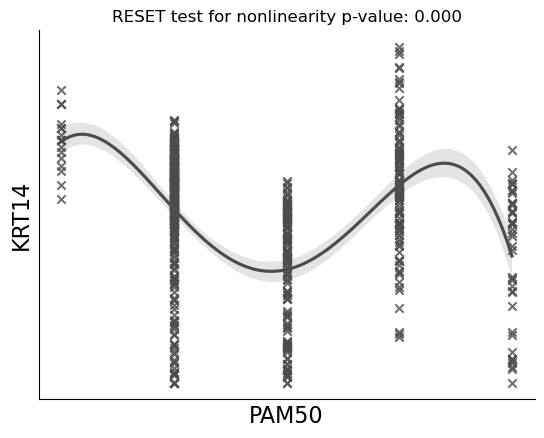

pvalue: 3.644372598708681e-66


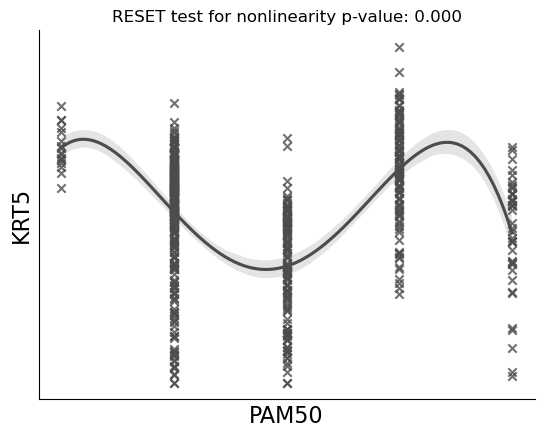

pvalue: 1.6897260919603833e-225


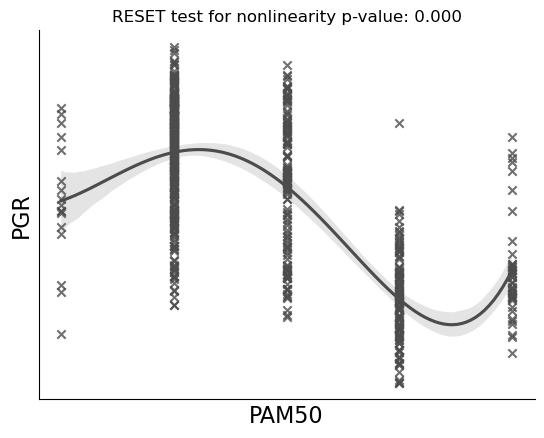

pvalue: 1.1489993782509657e-72


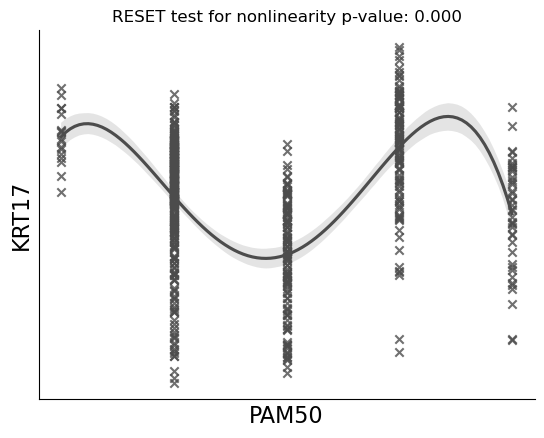

pvalue: 0.0


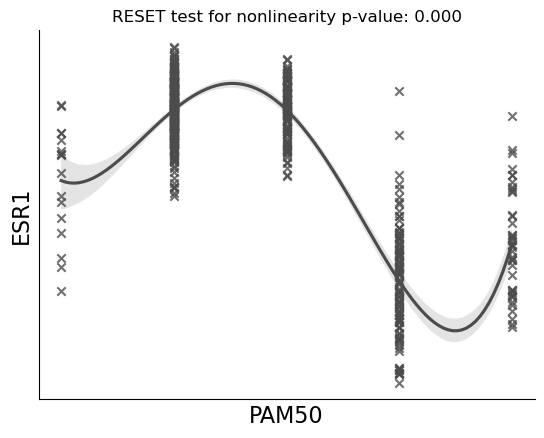

pvalue: 7.023668904734404e-18


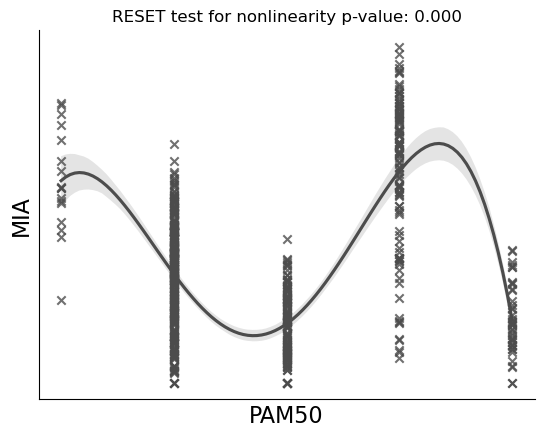

pvalue: 1.5566680113521624e-75


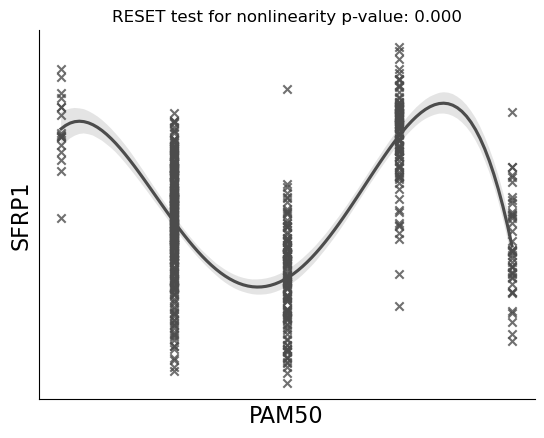

pvalue: 1.4162078124246974e-257


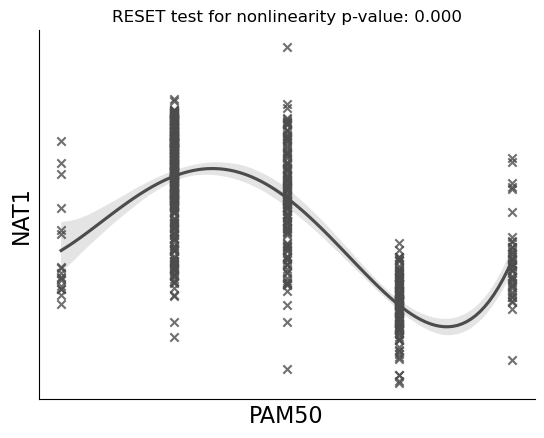

pvalue: 6.5173951804e-314


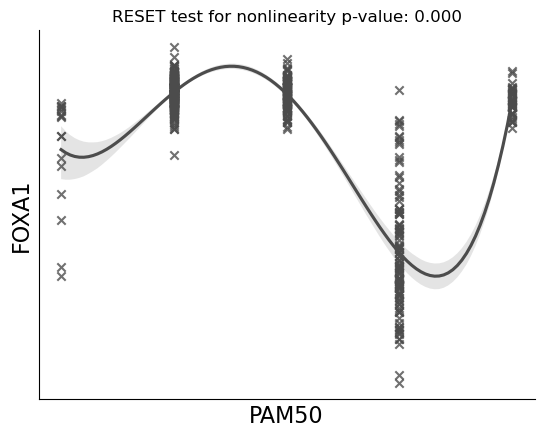

pvalue: 4.903420087046361e-291


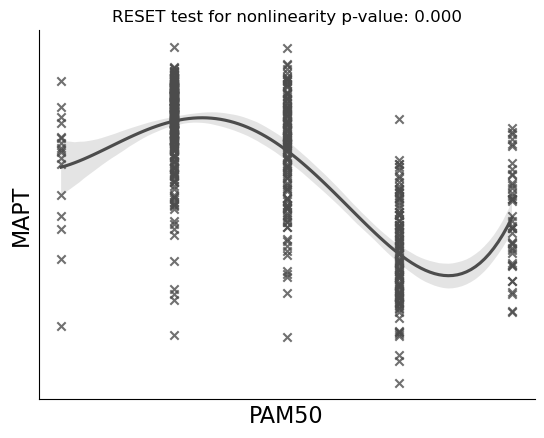

pvalue: 0.0


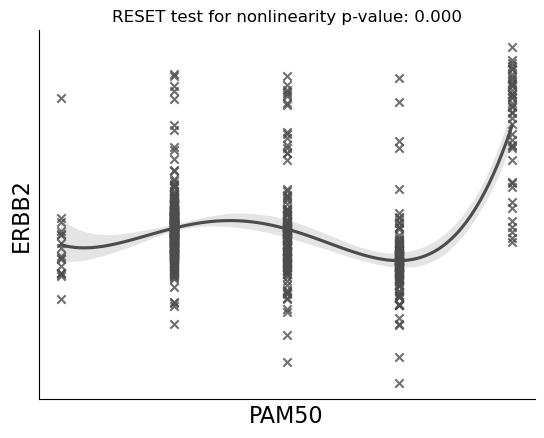

In [120]:
# BRCADataPM50.to_csv(data_path+'BRCADataPM50.csv',index=None)
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_reset

relation_list = [("KRT14","PAM50Call_RNAseq"),("KRT5","PAM50Call_RNAseq"),("PGR","PAM50Call_RNAseq"),("KRT17","PAM50"),("ESR1","PAM50"),("MIA","PAM50"),("SFRP1","PAM50"),("NAT1","PAM50")
                 ,("FOXA1","PAM50"),("MAPT","PAM50"),("ERBB2","PAM50")];

for edge in relation_list:
    y_label = edge[0];
    x_label = "PAM50Call_RNAseq";
    ax = sns.regplot(data=BRCADataPM50, x=x_label, y=y_label, order=4,marker="x", color=".3");
    ax.set(xlabel='PAM50', ylabel=y_label,xticks=[],yticks=[]);
    ax.spines[['right', 'top']].set_visible(False);
    
    ax.xaxis.label.set_size(16)
    ax.yaxis.label.set_size(16)
    
    
    temp_df[y_label].values;
    regression = sm.OLS(BRCADataPM50[y_label].values, BRCADataPM50[x_label].values);
    result = regression.fit();
    #Ramsey’s RESET test for neglected nonlinearity
    test_res = linear_reset(result, power = [2,3], use_f=True);
    pvalue = Utils.parse_reset_sum(test_res.summary());
    print("pvalue: {}".format(pvalue));
    
    plt.title(f'RESET test for nonlinearity p-value: {pvalue:.3f}')
    #plt.text(0.1, 0.85, f'RESET test for nonlinearity p-value: {pvalue:.3f}', transform=ax.transAxes)
    
    # save_file = x_label+"_"+y_label+".svg"
    # ax.figure.savefig(file_path+save_file);
    plt.show();

In [34]:
#Dict that contains info if a variable is discrete or not (discrete if True, countinous elsewise)
data_type_dict, discrete_list = Utils.check_variable_type(BRCADataPM50);

#Map the feature names with indeces
#Convert the columns to their numerical representations
name_index_mapping = {};
index_name_mapping = {};
index_data_type_dict = {};
colList = BRCADataPM50.columns.tolist();
for index,name in enumerate(colList):
    name_index_mapping[name] = index;
    index_name_mapping[index] = name;
    index_data_type_dict[index] = data_type_dict[name];
# print(name_index_mapping);
# print(index_name_mapping);
# print(index_data_type_dict);
    
#Target feature list
target_var_list = ['PAM50Call_RNAseq'];

var_list = list(BRCADataPM50.columns);

temp_relations_list = [];

#When there is a target feature list defined, the iteration strategy is different when there is not target features defined.
if len(target_var_list)>0:
    for target in target_var_list:
        for var in var_list:
            if var!=target:
                idx1 = name_index_mapping[target];
                idx2 = name_index_mapping[var];
                temp_relations_list.append((idx1,idx2));
                print(str(target)+"-"+str(var));

PAM50Call_RNAseq-CLEC3A
PAM50Call_RNAseq-CPB1
PAM50Call_RNAseq-SCGB2A2
PAM50Call_RNAseq-SCGB1D2
PAM50Call_RNAseq-TFF1
PAM50Call_RNAseq-GSTM1
PAM50Call_RNAseq-PIP
PAM50Call_RNAseq-S100A7
PAM50Call_RNAseq-MUCL1
PAM50Call_RNAseq-CYP2B7P1
PAM50Call_RNAseq-ANKRD30A
PAM50Call_RNAseq-PRAME
PAM50Call_RNAseq-CYP4Z1
PAM50Call_RNAseq-KCNJ3
PAM50Call_RNAseq-AGR3
PAM50Call_RNAseq-HMGCS2
PAM50Call_RNAseq-TFAP2B
PAM50Call_RNAseq-SERPINA6
PAM50Call_RNAseq-MUC6
PAM50Call_RNAseq-DHRS2
PAM50Call_RNAseq-SLC30A8
PAM50Call_RNAseq-UGT2B11
PAM50Call_RNAseq-COL2A1
PAM50Call_RNAseq-VSTM2A
PAM50Call_RNAseq-C4orf7
PAM50Call_RNAseq-TAT
PAM50Call_RNAseq-ADIPOQ
PAM50Call_RNAseq-ADH1B
PAM50Call_RNAseq-CALML5
PAM50Call_RNAseq-GP2
PAM50Call_RNAseq-GABRP
PAM50Call_RNAseq-MYBPC1
PAM50Call_RNAseq-KRT14
PAM50Call_RNAseq-CEACAM5
PAM50Call_RNAseq-MUC5B
PAM50Call_RNAseq-TFF3
PAM50Call_RNAseq-C1orf64
PAM50Call_RNAseq-SOX10
PAM50Call_RNAseq-GRIA2
PAM50Call_RNAseq-KRT5
PAM50Call_RNAseq-CRABP1
PAM50Call_RNAseq-GSTT1
PAM50Call_RNA

In [41]:
directed_graph = nx.DiGraph();
print(directed_graph.number_of_edges())
if 

0
